In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import graphviz as gv

# Let's talk about attention

# Transformers: Executive Summary

Let's start with defining what our transformer is. A transformer is a function $\mathcal{F}$ where:

$$\mathcal{F}(W_i, C_i; x) \to {C_i}', x'$$

A model is a function which starts with a small lookup table (on the order of
$10^6$ parameters) and then applies the transformer function $\mathcal{F}$ a
number of times:

$$\mathcal{M}(\mathbf{W}, \mathbf{C}, x) \to \mathbf{C'} + x'$$

Then $x'$ is passed through a linear $\mathcal{F}_\text{cls}$ function to get
the output, which is a probability distribution over the vocabulary. We sample
from this distribution to get the next word, and then we repeat the process.

An *inference farm* is a a service that provides $\mathcal{F}$-as-a-service with
extreme parallelism. Of course, we should not count out
$\mathcal{F}_\text{cls}$, which also has some computational overhead; but's for
now, let's make two simplifying assumptions:

- Function $\mathcal{F}_\text{cls}$ and the subsequent sampling are free.
- There's only one $\mathbf{W}$ (i.e., the model is fixed).

Okay, let's turn our focus into the inside of the transformer $\mathcal{F}$. It
has three stages:

- Pre-Attention
- Attention
- Post-Attention

The pre-attention step is a function $\mathcal{F}_\text{pre}$ that takes only
$W_i$ and $x$ as input, and produce some intermediate values:

$$\mathcal{F}_\text{pre}(W_i; x) \to x', a, b$$

Size of $a$ and $b$ are almost the same as the size of $x$. Next, we get to
attention which as input receives $C_i$, $A$, $B$ and $x$ (no $W_i$):

$$\mathcal{F}_\text{att}(C_i; a, b, x) \to C_i', x'$$

Finally, we have the post-attention step, which takes $C_i$, $x$ and $x'$ as
input:

$$\mathcal{F}_\text{post}(W_i, C_i; x, x') \to C_i', x_\text{out}$$

We identify $x$ as one-dimensional array of $d$ floats, where $d$ is a constant
per Model $\mathcal{M}$. Similarly, $W_i$ is a one-dimensional array of $L_W$
floats. This is also a constant per Model $\mathcal{M}$ ("parameters"). $C_i$
starts as an empty array, and with each invocation of $\mathcal{F}$, it grows by
$2d'$ floating-point numbers. There's a maximum on how much $C_i$ can grow, and
it's $L_C$ floats (wide range of $2^10--2^{20} and beyond). 

# Pre-Attention

Long story short, the bulk of computations in pre-attetion is two matrix
multiplications. The first one is $d \times d$ matrix, and the second one is a
$d \times 2d'$ matrix (no data dependency between the two). 

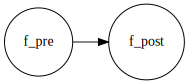

In [4]:
g = gv.Digraph()
g.graph_attr['rankdir'] = 'LR'
g.node_attr['shape'] = 'circle'

g.edge('F' )g


```mermaid
flowchart LR

A[Hard] -->|Text| B(Round)
B --> C{Decision}
C -->|One| D[Result 1]
C -->|Two| E[Result 2]
```